# Exercise 6.2 - TASK 

#### 1. Importing libraries and dataset
#### 2. Wrangling Data in order to map it
#### 3. Checking for missing and extreme values
#### 4. Creating a choropleth map

## 01. Importing libraries and dataset

In [1]:
# Importing our libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Set max_columns to None to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Creating the default 'path' for easier reference
path = r'C:\Users\peter\Desktop\Career Foundry - Data Analyst\Data Immersion\Achievement 6 - Advanced Analytics\Achievement 6 - Project'

In [4]:
# Importing the listings dataset
df = pd.read_pickle(os.path.join(path, '02. Data\Modified\listings_clean.pkl'))

In [5]:
df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,360.0,666,2008-07-08,"Denver, CO",within an hour,100%,96%,t,Highland,4,4,"Denver, Colorado, United States",Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,136.0,30,60,30,30,60,60,30.0,60.0,t,0,23,53,143,178,8,1,2018-08-13,2023-06-16,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2.99
1,364.0,783,2008-07-11,"Denver, CO",nan,nan,nan,f,Five Points,1,1,"Denver, Colorado, United States",Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,179.0,185,365,185,185,365,365,185.0,365.0,t,23,53,83,358,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.51
2,590.0,933,2008-07-21,"Denver, CO",within an hour,100%,97%,nan,North Park Hill,2,2,"Denver, Colorado, United States",North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,1 shared bath,NaN,1.0,84.0,1,300,1,1,300,300,1.0,300.0,t,15,45,63,242,702,48,7,2009-03-29,2023-06-24,4.85,4.79,4.58,4.93,4.95,4.75,4.86,4.04
3,592.0,933,2008-07-21,"Denver, CO",within an hour,100%,97%,nan,North Park Hill,2,2,nan,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,1 shared bath,NaN,1.0,65.0,28,365,28,28,365,365,28.0,365.0,t,8,8,8,174,168,1,1,2009-02-21,2023-06-24,4.87,4.75,4.55,4.94,4.94,4.81,4.86,0.96
4,1940.0,2150,2008-08-16,"Denver, CO",within an hour,100%,100%,t,Baker,1,1,"Denver, Colorado, United States",Baker,39.720486,-104.997520,Entire guesthouse,Entire home/apt,2,1 bath,NaN,1.0,111.0,1,120,1,1,1125,1125,1.0,1125.0,t,6,22,44,129,132,35,2,2017-01-24,2023-06-04,4.95,4.94,4.97,4.98,4.98,4.91,4.86,1.69


## 02. Wrangling the data 

In [6]:
# Creating a list then subset to include only the columns we want to analyze based on our hypothesis 
df_wrangle = ['neighbourhood_cleansed','room_type','price','accommodates']

In [7]:
# Creating the subset dataframe
df2 = df[df_wrangle]

In [8]:
# Renaming the neighbourhoods column so that it matches the last exercise
df2.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True)

C:\Users\peter\AppData\Local\Temp\ipykernel_21852\122133726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True)


In [9]:
# Calculating the avg_price for each hood by grouping them, then running a transform for the mean value
df2['avg_price'] = df2.groupby('neighbourhood')['price'].transform('mean')

# Round the average price to two decimal places
df2['avg_price'] = df2['avg_price'].round(2)

C:\Users\peter\AppData\Local\Temp\ipykernel_21852\2331816815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_price'] = df2.groupby('neighbourhood')['price'].transform('mean')
C:\Users\peter\AppData\Local\Temp\ipykernel_21852\2331816815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_price'] = df2['avg_price'].round(2)


In [10]:
# Creating a new column that counts the total number of listings for the rows neighbourhood
df2['neighbourhood_count'] = df2.groupby('neighbourhood')['neighbourhood'].transform('count')

C:\Users\peter\AppData\Local\Temp\ipykernel_21852\4024956236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['neighbourhood_count'] = df2.groupby('neighbourhood')['neighbourhood'].transform('count')


In [11]:
df2.head()

,neighbourhood,room_type,price,accommodates,avg_price,neighbourhood_count
0,Highland,Entire home/apt,136.0,3,232.05,345
1,Five Points,Entire home/apt,179.0,3,243.91,452
2,North Park Hill,Private room,84.0,3,219.16,82
3,North Park Hill,Private room,65.0,2,219.16,82
4,Baker,Entire home/apt,111.0,2,146.87,138


## 03. Consistency checks, extreme values

<Axes: xlabel='price', ylabel='Count'>

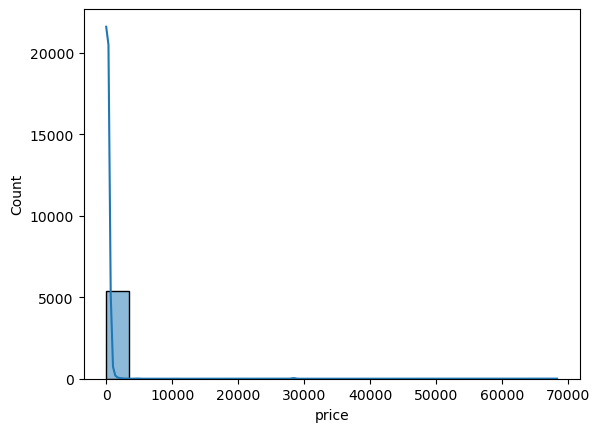

In [12]:
# Histogram to check the price distribution
sns.histplot(df['price'], bins=20, kde = True)

In [13]:
# Removing the listings with a price < 10000 and > 0.
df2 = df2[(df2['price'] <10000) & (df2['price'] >0)]

In [14]:
df2.shape

(5367, 6)

In [15]:
# Checking for missing values
df2.isnull().sum()

neighbourhood          0
room_type              0
price                  0
accommodates           0
avg_price              0
neighbourhood_count    0
dtype: int64

## 04. Data prep for regression analysis

### Setting up the first variable relationship
### "If a listing is in a neighborhood with a higher number of total listings, it will have a lower price."

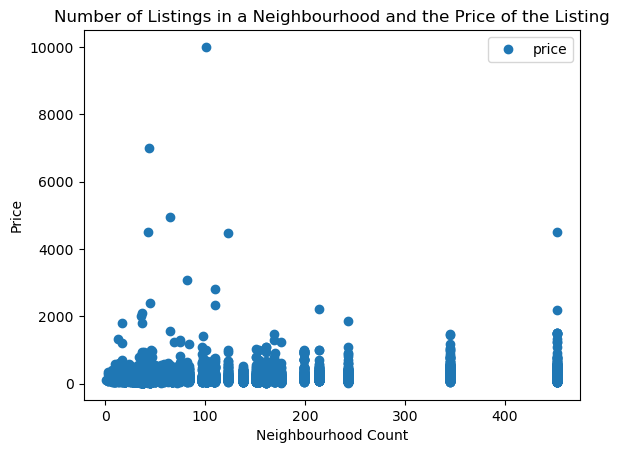

In [16]:
# Creating a scatter plot of the data frame df2 to compare the chosen variables against eachother
# We are looking to compare the relationship between the number of listings in a neighborhood and the price.

df2.plot(x = 'neighbourhood_count', y='price',style='o')
plt.title('Number of Listings in a Neighbourhood and the Price of the Listing')  
plt.xlabel('Neighbourhood Count')  
plt.ylabel('Price')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df2['neighbourhood_count'].values.reshape(-1,1)
y = df2['price'].values.reshape(-1,1)

In [18]:
X

array([[345],
       [452],
       [ 82],
       ...,
       [ 36],
       [243],
       [214]], dtype=int64)

In [19]:
y

array([[136.],
       [179.],
       [ 84.],
       ...,
       [151.],
       [209.],
       [141.]])

In [20]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Setting up another variable relationship for regression testing
### "If a listing accomodates more guests, it will have a higher price."

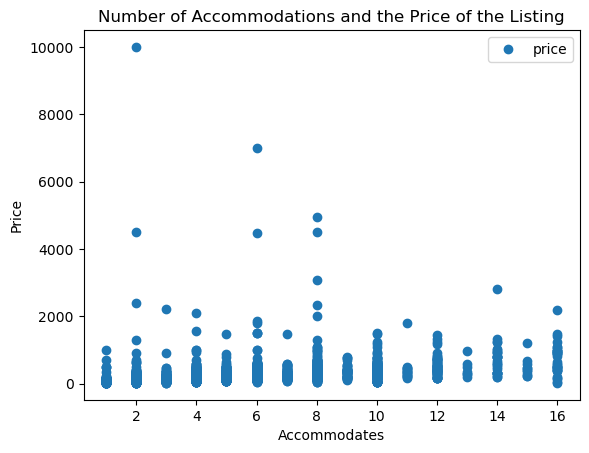

In [21]:
# Creating another scatter plot to run a regression on another variable relationship. 


df2.plot(x = 'accommodates', y='price',style='o')
plt.title('Number of Accommodations and the Price of the Listing')  
plt.xlabel('Accommodates')  
plt.ylabel('Price')  
plt.show()

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X2 = df2['accommodates'].values.reshape(-1,1)
y2 = df2['price'].values.reshape(-1,1)

In [23]:
X2

array([[ 3],
       [ 3],
       [ 3],
       ...,
       [ 6],
       [10],
       [ 2]], dtype=int64)

In [24]:
y2

array([[136.],
       [179.],
       [ 84.],
       ...,
       [151.],
       [209.],
       [141.]])

In [25]:
# Split data into a training set and a test set.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

## 05. Regression analysis

In [26]:
# Create a regression object
regression = LinearRegression()

In [27]:
# Fit the object to the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

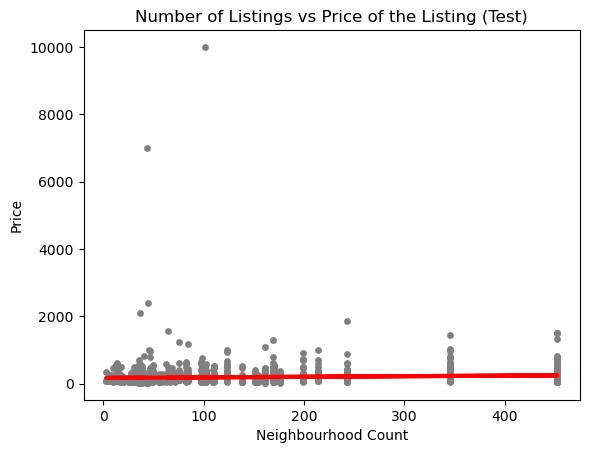

In [29]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Listings vs Price of the Listing (Test)')
plot_test.xlabel('Neighbourhood Count')
plot_test.ylabel('Price')
plot_test.show()

#### Based on the graph and the linear regression line that was plotted, this is not a good fit. The variables do not share any sort of relationship and a linear model is not the best way to predict any future values. I slightly knew this going into the regression analysis because of the intial scatter plot. 
#### With the dataset that I have and have been analyzing, I have found it hard to pin down any variable relationships that might have a positive correlation. It seems that most all of the variables in the data set do not have an effect on the pricing. This makes me think of other questions outside of the scope of this project (and my skill set at the moment), but there must be some factor that helps indicate the price of a listing. Things that come to mind would be the price of other similar properties in the neighborhood, social events or activities in the Denver area, age of the house/apartment, or amenities and the quality of furnishings. These are all pieces of information I do not have access to for this analysis. 

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [31]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17104005]]
Mean squared error:  123669.82665789967
R2 score:  0.0014869997411507407


In [32]:
y_predicted

array([[178.14619995],
       [184.47468177],
       [172.67291837],
       ...,
       [201.06556655],
       [172.67291837],
       [173.69915867]])

In [33]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data

,Actual,Predicted
0,115.0,178.146200
1,71.0,184.474682
2,233.0,172.672918
3,126.0,175.067479
4,220.0,226.037414
...,...,...
1606,35.0,197.131645
1607,454.0,190.632124
1608,94.0,201.065567
1609,228.0,172.672918


#### When looking at the numbers from the Slope, Mean squared error and the R2 score, the model performed terribly. It was not a good fit and did not indicate any sort of correlation between the two variables I selected. The Mean squared error of 123669.82 and R2 score of  0.0014 are extremely high and very close to 0 (respectively). Additionally, when I look at the actual and predicted values for 'price', I can see that the model is again way off. We need to go back to the drawing board and come up with a different model for the variables, or come up with new variables to analyze. 
#### I do not think that the data frame that I ran the model on has any bias associated with it. I excluded some really extreme values for 'price', but I do not consider that bias as they were extreme outliers and most likely incorrect data. I did keep values of <10000, and I can see that those are potentially affecting the model for the bonus regression test below, but removing them would subject the data to sample bias. 

### Bonus Regression test 

In [34]:
# Create another regression object
regression2 = LinearRegression()

In [35]:
# Fit the object to the training set.
regression2.fit(X2_train, y2_train)

LinearRegression()

In [36]:
# Predict the values of y using X
y2_predicted = regression2.predict(X2_test)

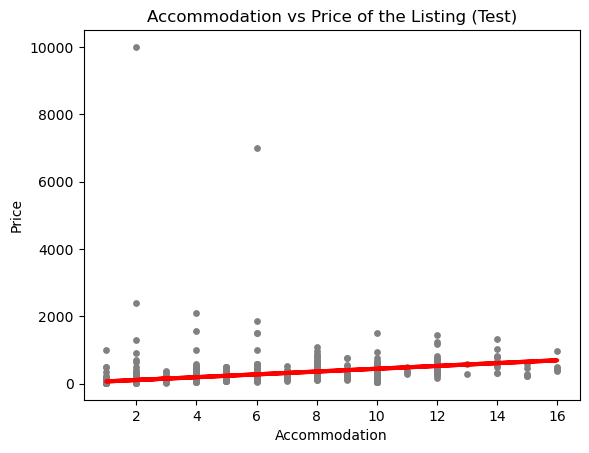

In [37]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Accommodation vs Price of the Listing (Test)')
plot_test.xlabel('Accommodation')
plot_test.ylabel('Price')
plot_test.show()

In [38]:
# Create objects that contain the model summary statistics.

rmse2 = mean_squared_error(y2_test, y2_predicted)
r2_2 = r2_score(y2_test, y2_predicted)

In [39]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[0.17104005]]
Mean squared error:  115214.7076466469
R2 score:  0.06975382342503711
